In [88]:
import numpy as np
import pandas as pd
from random import choices
import math
import scipy.stats as st
import matplotlib.pyplot as plt
import statistics 

# exercise 1.1

In [62]:
# parameters
N = 500

In [63]:
def create_data(N):
    Y = np.array(choices([0,1],[0.5,0.5], k=N))
    X = np.array([random.random() for p in range(0,N)] )
    X = st.uniform.ppf(X) 
    return X,Y

(array([ 6.,  1.,  2.,  4.,  6.,  9., 10.,  2.,  2.,  7.,  5.,  8.,  7.,
        13.,  5.,  6.,  5.,  3.,  5.,  5.,  4.,  8.,  3.,  4.,  5.,  3.,
         3.,  5.,  3.,  5., 10.,  2.,  6.,  2.,  2.,  1.,  2.,  3.,  7.,
         4.,  7.,  2.,  8.,  5.,  3.,  5.,  4.,  3.,  4.,  4.,  4., 12.,
         6.,  6.,  5.,  5.,  2.,  3.,  2.,  5.,  5.,  3.,  6.,  8.,  2.,
         3.,  5.,  3.,  5.,  4.,  7.,  3., 12.,  4.,  5.,  5.,  6.,  4.,
        11.,  6.,  6.,  3.,  3.,  7.,  8.,  3.,  8.,  1.,  7.,  5.,  5.,
         5.,  3.,  5.,  8.,  4.,  4.,  6.,  6.,  8.]),
 array([8.81676705e-04, 1.08462804e-02, 2.08108840e-02, 3.07754877e-02,
        4.07400913e-02, 5.07046950e-02, 6.06692986e-02, 7.06339023e-02,
        8.05985059e-02, 9.05631096e-02, 1.00527713e-01, 1.10492317e-01,
        1.20456921e-01, 1.30421524e-01, 1.40386128e-01, 1.50350731e-01,
        1.60315335e-01, 1.70279939e-01, 1.80244542e-01, 1.90209146e-01,
        2.00173750e-01, 2.10138353e-01, 2.20102957e-01, 2.30067561e-01,
  

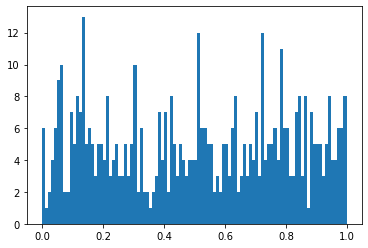

In [69]:
N_points = 100000
n_bins = 100

x, y = create_data(N)
plt.hist(x, bins = 100)

# fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
# axs[0].hist(x, bins=n_bins)
# axs[1].hist(y, bins=n_bins)

# exercise 1.2

In [77]:
# parameters
xt = 0.5 # thereshold
M = [10,100,1000,10000] # size of the test size
testset = 10 # test set size

In [80]:
# rule A
def cal_ya(x,xt):
    lambd = lambda y: 0 if y < xt else 1
    return [lambd(i) for i in x]

# y = []
# for i in x:
#     if i < xt:
#         y.append(0)
#     else 
#         y.append(1)
#     return y
    
# rule B
def cal_yb(x,xt):
    lambd = lambda y: 0 if y > xt else 1
    return [lambd(i) for i in x]

In [83]:
# error 
pa = 1/4 + math.pow(xt - 0.5,2)
pb = 3/4 - math.pow(xt - 0.5,2)
print(pa, pb)

0.25 0.75


In [92]:
std = []
e_mean =[]

for m in M:
    error = []
    for i in range(testset):
        x,y = create_data(m)
        error.append((y-cal_ya(x,xt)) + (y-cal_yb(x,xt))) 
    e_mean.append(np.mean(error))
    std.append(np.std(error))
        
    

In [93]:
e_mean

[-0.02, -0.002, -0.008, -0.00354]

In [94]:
std

[0.999799979995999, 0.999997999998, 0.9999679994879836, 0.9999937341803696]

# exercise 1.3

In [120]:
# rule C
def cal_yc(x):
    return np.array(choices([0.0,1.0],[0.5,0.5], k=len(x)))
# rule D
def cal_yd(x):
    arr = np.empty(len(x))
    arr.fill(1)
    return arr

In [122]:
std_c = []
std_d = []
e_mean_c =[]
e_mean_d =[]
for m in M:
    error_c = []
    error_d = []
    for i in range(testset):
        x,y = create_data(m)
        error_c.append(y-cal_yc(x))
        error_d.append(y-cal_yd(x)) 
    e_mean_c.append(np.mean(error_c))
    e_mean_d.append(np.mean(error_d))
    std_c.append(np.std(error_c))
    std_d.append(np.std(error_d))
print(e_mean_c,e_mean_d, std_c,std_d)

[-0.01, -0.013, 0.0001, -0.00051] [-0.5, -0.488, -0.5022, -0.50131] [0.6707458535093603, 0.6905295069727287, 0.7059036690654045, 0.7078910508687053] [0.5, 0.49985597925802594, 0.49999515997657423, 0.4999982838970549]


# exercise 1.4